# Inteligência Artificial - SCC 0230

Alunas : Mônica Amaral Novelli e Brenda da Silva Muniz

NUSP: 11810453 e 11810453

# Regressão linear simples

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 25.3 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo_plano,peso,altura,cintura
0,16,871,60,160,90
1,23,1132,70,165,92
2,28,1242,72,180,93
3,33,1356,71,188,91
4,38,1488,82,178,105
5,43,1638,79,171,100
6,48,2130,105,177,135
7,53,2454,95,169,120
8,58,3066,90,173,119
9,63,4090,92,168,121


In [ ]:
X_plano_saude = base_plano_saude.iloc[:, 0].values

X_plano_saude

array([16, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
y_plano_saude = base_plano_saude.iloc[:, 1].values

y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [ ]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.92583998],
       [0.92583998, 1.        ]])

In [ ]:
X_plano_saude.shape

(10,)

In [ ]:
X_plano_saude = X_plano_saude.reshape(-1,1)

X_plano_saude.shape

(10, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor_plano_saude = LinearRegression()

regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [ ]:
# b0
regressor_plano_saude.intercept_

-478.550299151246

In [ ]:
# b1
regressor_plano_saude.coef_

array([60.17990817])

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8571796770204381

In [ ]:
previsoes = regressor_plano_saude.predict(X_plano_saude)

previsoes

array([ 484.32823153,  905.5875887 , 1206.48712954, 1507.38667038,
       1808.28621121, 2109.18575205, 2410.08529289, 2710.98483373,
       3011.88437457, 3312.7839154 ])

In [ ]:
X_plano_saude.ravel()

array([16, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressão')

grafico.show()

In [ ]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1928.64602755])

In [ ]:
regressor_plano_saude.predict([[40]])

array([1928.64602755])

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8571796770204381

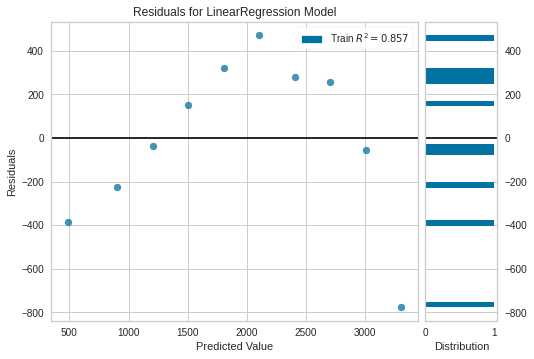

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)

visualizador.poof()

# Correlação

In [ ]:
base_plano_saude.corr()

,idade,custo_plano,peso,altura,cintura
idade,1.000000,0.925840,0.856275,0.095786,0.832558
custo_plano,0.925840,1.000000,0.712227,-0.094980,0.744908
peso,0.856275,0.712227,1.000000,0.141275,0.972832
altura,0.095786,-0.094980,0.141275,1.000000,-0.002905
cintura,0.832558,0.744908,0.972832,-0.002905,1.000000


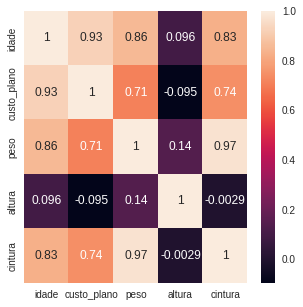

In [ ]:
figura = plt.figure(figsize=(5,5))

sns.heatmap(base_plano_saude.corr(), annot=True);

# Medidas de erro

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_teste, y_predito)

914.3

In [ ]:
mean_squared_error(y_teste, y_predito)

In [ ]:
np.sqrt(mean_squared_error(y_teste, y_predito))

# Regressão linear múltipla

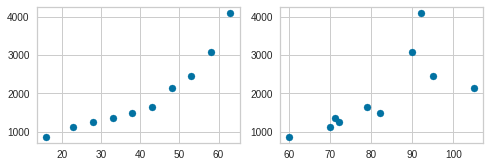

In [ ]:

colunas = ['idade', 'peso']

X = base_plano_saude[colunas]
y = base_plano_saude.custo_plano

plt.subplot(2,2,1)
plt.scatter(X['idade'],y)
plt.subplot(2,2,2)
plt.scatter(X['peso'],y)


Analisando visualmente apenas, podemos constatar que ambas possuem uma relação linear, porém, a idade com o custo do plano forma uma relação linear forte; enquanto peso com o custo do plano, fraca.

Text(0.5, 0, 'Custo do plano')

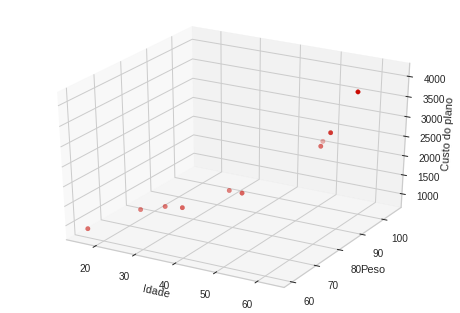

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = X["idade"]
x2 = X["peso"]
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('Idade')
ax.set_ylabel('Peso')
ax.set_zlabel('Custo do plano')

In [ ]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)


In [ ]:
theta0 = mlr_model.intercept_
theta1, theta2 = mlr_model.coef_
theta0, theta1, theta2

(637.9782638781403, 76.98360936347665, -21.981834818949128)

In [ ]:
idade = float(input('Digite uma idade:'))
peso = float(input('Digite um peso:'))

y_predito = mlr_model.predict([[idade, peso]])

print('É esperado que o plano de saúde para alguém com ', idade, ' anos, e pesando ', peso, 'kilos, seja de ',y_predito,' reais.')

Digite uma idade:30
Digite um peso:60
É esperado que o plano de saúde para alguém com  30.0  anos, e pesando  60.0 kilos, seja de  [1628.58]  reais.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
pred = mlr_model.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y, pred))

print(mean_squared_error(y, pred))

print(np.sqrt(mean_squared_error(y, pred)))




268.5556613342318
107951.1435196802
328.5591933269867


# Regressão polinomial

Text(0, 0.5, 'Peso')

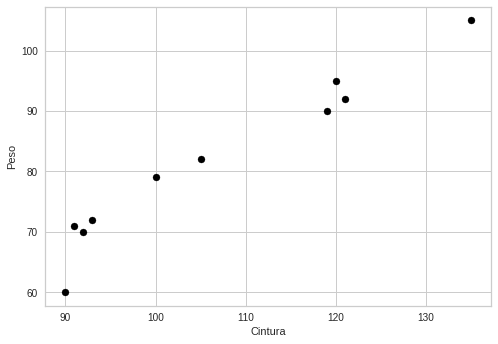

In [ ]:

X = base_plano_saude[['cintura']]
y = base_plano_saude.peso

plt.scatter(X, y, c = "black")
plt.xlabel("Cintura")
plt.ylabel("Peso")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

 
pre_process = PolynomialFeatures(degree=2)

X_poly = pre_process.fit_transform(X)

X_poly

array([[1.00e+00, 9.00e+01, 8.10e+03],
       [1.00e+00, 9.20e+01, 8.46e+03],
       [1.00e+00, 9.30e+01, 8.65e+03],
       [1.00e+00, 9.10e+01, 8.28e+03],
       [1.00e+00, 1.05e+02, 1.10e+04],
       [1.00e+00, 1.00e+02, 1.00e+04],
       [1.00e+00, 1.35e+02, 1.82e+04],
       [1.00e+00, 1.20e+02, 1.44e+04],
       [1.00e+00, 1.19e+02, 1.42e+04],
       [1.00e+00, 1.21e+02, 1.46e+04]])

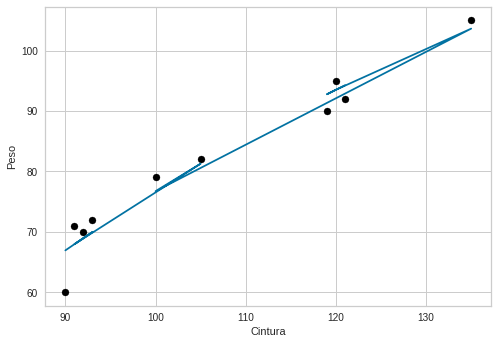

In [ ]:
pr_model = LinearRegression()

pr_model.fit(X_poly, y)

y_pred = pr_model.predict(X_poly)

plt.scatter(X, y, c = "black")
plt.xlabel("Cintura")
plt.ylabel("Peso")
plt.plot(X, y_pred)

In [ ]:
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_
theta0, theta1, theta2

(-63.62426253118514, 1.8736632407317493, -0.00470117459255337)

In [ ]:
cintura = float(input('Digite aqui um tamanho de cintura: '))

y_predito = pr_model.predict(pre_process.fit_transform([[cintura]]))

print('O peso esperado para alguém com ', cintura, ' de cintura é de:', y_predito)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y, y_pred))

print(mean_squared_error(y, y_pred))

print(np.sqrt(mean_squared_error(y, y_pred)))


2.3906674067034372
8.497177627916198
2.914991874416839


# Árvores de decisão

Text(0, 0.5, 'Custo do plano')

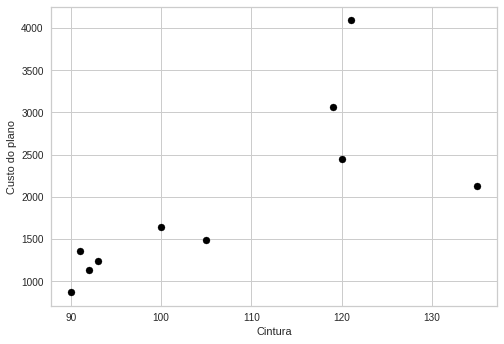

In [ ]:
X = base_plano_saude[['cintura']]
y = base_plano_saude.custo_plano

plt.scatter(X, y, c = "black")
plt.xlabel("Cintura")
plt.ylabel("Custo do plano")

In [ ]:

from sklearn.tree import DecisionTreeRegressor 
  

regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
cintura = float(input('Digite aqui um tamanho de cintura: '))
y_predito = regressor.predict([[cintura]])

print('O custo do plano esperado para alguém com ', cintura, ' de cintura é de:', y_predito, 'reais')

KeyboardInterrupt: ignored

In [ ]:
pred = regressor.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y, pred))

print(mean_squared_error(y, pred))

print(np.sqrt(mean_squared_error(y, pred)))

0.0
0.0
0.0


# Random forest

Text(0, 0.5, 'Custo do plano')

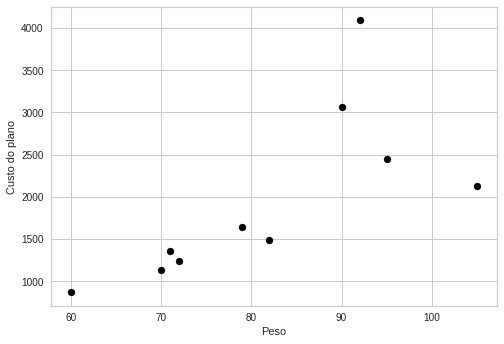

In [ ]:

X = base_plano_saude[['peso']]
y = base_plano_saude.custo_plano

plt.scatter(X, y, c = "black")
plt.xlabel("Peso")
plt.ylabel("Custo do plano")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size=0.8, random_state=42
)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
peso = float(input('Digite aqui um peso: '))

y_predito = rfc.predict([[cintura]])

print('O custo do plano esperado para alguém pesando ', cintura, ' é de:', y_predito, 'reais')

Digite aqui um peso: 50
O custo do plano esperado para alguém pesando  67.0  é de: [1356] reais


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
pred=rfc.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y, pred))

print(mean_squared_error(y, pred))

print(np.sqrt(mean_squared_error(y, pred)))

124.8
109875.2
331.4742825620111


# Support Vector Regression

Text(0, 0.5, 'Peso')

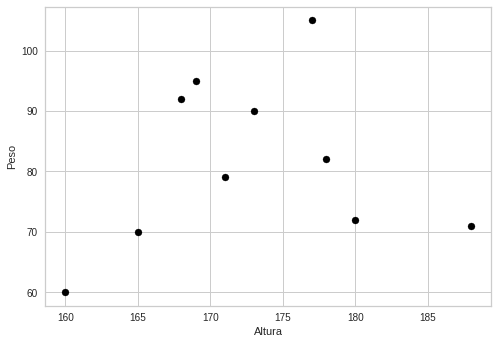

In [ ]:
X = base_plano_saude[['altura']].values.astype(float)
y = base_plano_saude.peso.values.astype(float)

plt.scatter(X, y, c = "black")
plt.xlabel("Altura")
plt.ylabel("Peso")

In [ ]:
X = X.reshape(-1,1)

y = y.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()